In [1]:
# LeedsNet.py : It is a deep learning network created by @leopauly (cnlp@leeds.ac.uk)

import numpy
import glob
from PIL import Image
import datetime
import sys
from scipy import misc
from scipy import ndimage
from matplotlib import pyplot 
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import History,CSVLogger 
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [2]:
seed = 7
numpy.random.seed(seed)

In [3]:
#Load data base and give image propereties like hight, width etc.
imagefolderpath= ('./humanvsanimaldataset/') 
imagePath = glob.glob(imagefolderpath+'/*.jpg') 
X=numpy.array([numpy.array(Image.open(str(imagefolderpath+str(i)+'.jpg')).convert('RGB'),'f') for i in range(1,20624)])

print (X.shape)  
img_rows=32;
img_cols=32;
channel=3;
nb_classes=2

(20623, 32, 32, 3)


In [4]:
y_1=numpy.array([(0) for i in range (0,13233)]);
y_2=numpy.array([(1) for i in range (13233,20623)]);

print(y_1.size)
print(y_2.size)

y=numpy.append(y_1,y_2)

print (y.size) 
#print (y)


13233
7390
20623


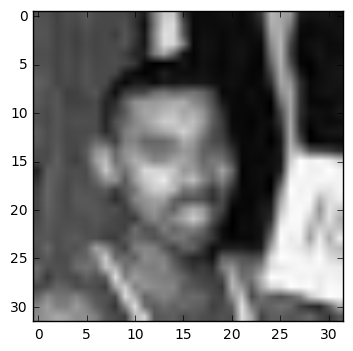

0


In [5]:
#to display and check if images and labels are in order
def checker(check):
   myimage = array_to_img(X[check])
   pyplot.imshow(myimage)
   pyplot.show()
   print(y[check])
    
checker(13232)

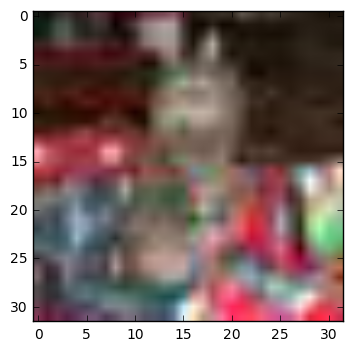

1


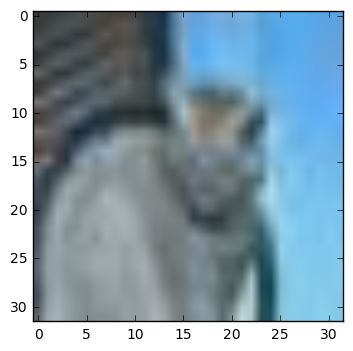

1


In [6]:
X,y = shuffle(X,y, random_state=1)
X,y = shuffle(X,y, random_state=2)

checker(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
#(X_train, y_train),(X_test,y_test)=cifar10.load_data()

check_val=23
myimage = array_to_img(X_train[200])
myimage=X_train[check_val]
pyplot.imshow(myimage)
pyplot.show()
print (y_train[check_val])


(18560, 32, 32, 3)
(2063, 32, 32, 3)
(18560, 32, 32, 3)
(2063, 32, 32, 3)


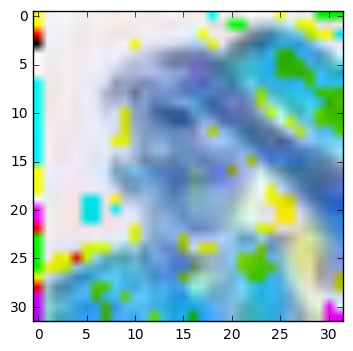

0
(18560,)
(2063,)
(18560, 2)
(2063, 2)


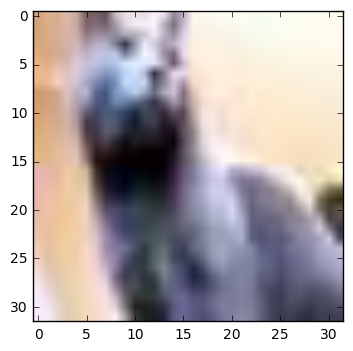

[ 0.  1.]


In [7]:
print (X_train.shape)
print (X_test.shape)

K.set_image_dim_ordering('tf')
X_train = X_train.reshape(X_train.shape[0],img_rows, img_cols,channel)
X_test = X_test.reshape(X_test.shape[0],img_rows, img_cols,channel)
input_shape=(img_rows,img_cols,channel)

print (X_train.shape)
print (X_test.shape)

check_val2=345
myimage = array_to_img(X_train[2])
myimage=X_train[check_val2]
pyplot.imshow(myimage)
pyplot.show()
print (y_train[check_val2])


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print (y_train.shape)
print (y_test.shape)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print (y_train.shape)
print (y_test.shape)

myimage = array_to_img(X_train[2])
pyplot.imshow(myimage)
pyplot.show()
print (y_train[2])


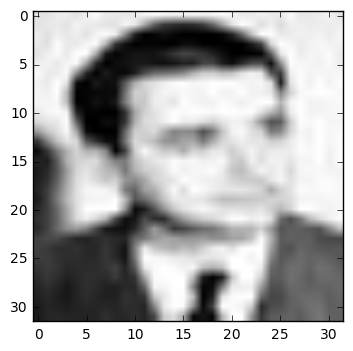

In [24]:
new_imagefolderpath= ('./huamanvsanimaldataset_test/') 
new_imagePath = glob.glob(new_imagefolderpath+'/*.jpg') 
X_new=numpy.array([numpy.array(Image.open(str(new_imagefolderpath+str(i)+'.jpg')).convert('RGB'),'f') for i in range(1,301)])

y_1_new=numpy.array([(1) for i in range (0,150)]);
y_2_new=numpy.array([(0) for i in range (150,300)]);

print(y_1_new.shape)
print(y_2_new.shape)
print(y_new.shape)

y_new=numpy.append(y_1_new,y_2_new)
y_new = np_utils.to_categorical(y_new, nb_classes)

print (y_new.shape) 
#print (y)

def checker(check):
   myimage = array_to_img(X_new[check])
   pyplot.imshow(myimage)
   pyplot.show()
   print(y_new[check])
    
checker(299)

In [9]:
LeedsNet = Sequential()
LeedsNet.add(Convolution2D(16, 3, 3, input_shape=input_shape, activation='relu',border_mode='valid'))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(Convolution2D(32, 3, 3, activation='relu', border_mode='valid'))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(MaxPooling2D(pool_size=(2, 2)))

LeedsNet.add(Flatten())
LeedsNet.add(Dense(256, activation='relu', W_constraint=maxnorm(3)))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(Dense(nb_classes, activation='softmax'))


In [10]:
epochs = 50
lrate = 0.01
sgd = SGD(lr=lrate, momentum=0.9, nesterov=True)
LeedsNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
b_size=12
#csv_logger = CSVLogger('trainingLeedsnet.log',separator=',', append=True)

start_time=datetime.datetime.now()
print (start_time)

history=LeedsNet.fit(X_train, y_train, nb_epoch=epochs, 
                     validation_data=(X_new, y_new),
                     batch_size=b_size, validation_split=0.2, 
                     shuffle='batch')

end_time=datetime.datetime.now()
print (end_time)

2017-02-09 18:15:21.497002
Train on 18560 samples, validate on 300 samples
Epoch 1/50
18560/18560 [==============================] - 18s - loss: 0.2456 - acc: 0.8942 - val_loss: 6.0527 - val_acc: 0.6100
Epoch 2/50
18560/18560 [==============================] - 18s - loss: 0.0745 - acc: 0.9733 - val_loss: 6.1394 - val_acc: 0.6167
Epoch 3/50
18560/18560 [==============================] - 19s - loss: 0.0552 - acc: 0.9807 - val_loss: 6.3855 - val_acc: 0.6033
Epoch 4/50
18560/18560 [==============================] - 18s - loss: 0.0423 - acc: 0.9852 - val_loss: 6.4980 - val_acc: 0.5933
Epoch 5/50
18560/18560 [==============================] - 18s - loss: 0.0364 - acc: 0.9868 - val_loss: 6.5798 - val_acc: 0.5833
Epoch 6/50
18560/18560 [==============================] - 18s - loss: 0.0309 - acc: 0.9885 - val_loss: 6.9464 - val_acc: 0.5600
Epoch 7/50
18560/18560 [==============================] - 18s - loss: 0.0285 - acc: 0.9901 - val_loss: 6.4719 - val_acc: 0.5933
Epoch 8/50
18560/18560 [=====

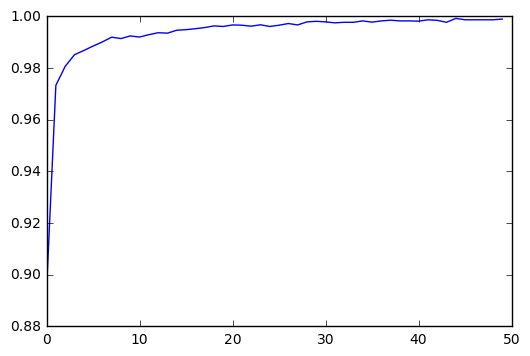

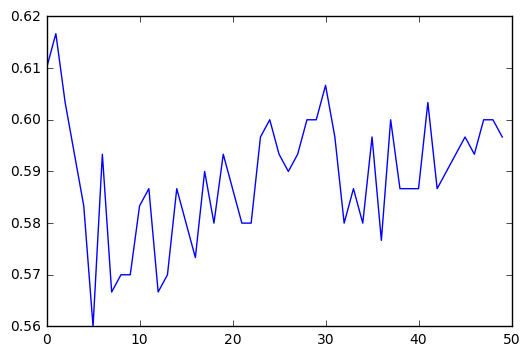

In [13]:
pyplot.plot(history.history['acc'])
pyplot.show()


pyplot.plot(history.history['val_acc'])
pyplot.show()

In [25]:
#Evaluated on images taken from same dataset
scores = LeedsNet.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


#Evaluated on images taken from different dataset dataset
scores = LeedsNet.evaluate(X_new, y_new, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

150
150
300


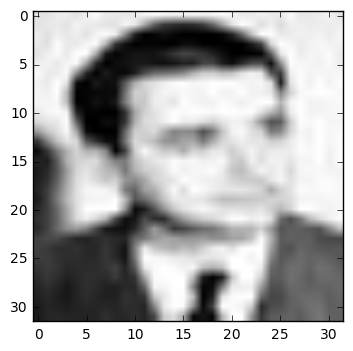

0


In [14]:
#For manaully evaluating the model on a new dataset

#new_imagefolderpath= ('./huamanvsanimaldataset_test/') 
#new_imagePath = glob.glob(new_imagefolderpath+'/*.jpg') 
#X_new=numpy.array([numpy.array(Image.open(str(new_imagefolderpath+str(i)+'.jpg')).convert('RGB'),'f') for i in range(1,301)])

#y_1_new=numpy.array([(1) for i in range (0,150)]);
#y_2_new=numpy.array([(0) for i in range (150,300)]);

#print(y_1_new.size)
#print(y_2_new.size)

#y_new=numpy.append(y_1_new,y_2_new)

#print (y_new.size) 
#print (y)

#def checker(check):
#   myimage = array_to_img(X_new[check])
#   pyplot.imshow(myimage)
#   pyplot.show()
#   print(y_new[check])
    
#checker(299)

#predictions = LeedsNet.predict(X_new)
#print (predictions)
#predictions.shape

In [16]:
#Calculating accuracy using the predicted output values
#rounded = [numpy.round(x) for x in predictions]
#print(rounded)
#ac=0;
#for z in range (0,300):
#    m= rounded[z]-y_test_new[z]
#    #print (m)
#    if (numpy.all(m==0)):
#        ac=ac+1;
     
#print ((ac/300.)*100)

In [17]:
#Preparing documentation

sys.stdout = open('LeedsNetlog.txt', 'a')

print("\n",'LeedsNet < New Attempts No.1> : Results when LeedsNet was trained on humanvsanimal dataset',"\n")
print("\n",'Network architechture',"\n")
print(LeedsNet.summary())
print("\n",'Results: Colomn headings',"\n",history.history.keys())
print("\n",'Results: Training',"\n",history.history,"\n")
print("\n",'Time taken for training',"\n",' Start Time:', start_time,"\n",'End Time:', end_time,"\n")
print("\n","Accuracy on testing data: %.2f%%" % (scores[1]*100),"\n")

#sys.stdout.close()